# File Upload

In [0]:
from google.colab import files
uploaded = files.upload()

Saving 0.mp3 to 0 (1).mp3
Saving 1.mp3 to 1 (1).mp3
Saving 2.mp3 to 2 (1).mp3
Saving 3.mp3 to 3 (1).mp3
Saving 4.mp3 to 4 (1).mp3
Saving 5.mp3 to 5 (1).mp3
Saving 6.mp3 to 6 (1).mp3
Saving 7.mp3 to 7 (1).mp3
Saving 8.mp3 to 8 (1).mp3
Saving 9.mp3 to 9 (1).mp3
Saving 10.mp3 to 10 (1).mp3
Saving 11.mp3 to 11 (1).mp3
Saving 12.mp3 to 12 (1).mp3
Saving 13.mp3 to 13 (1).mp3
Saving 14.mp3 to 14 (1).mp3
Saving 15.mp3 to 15 (1).mp3
Saving 16.mp3 to 16 (1).mp3
Saving 17.mp3 to 17 (1).mp3
Saving 18.mp3 to 18 (1).mp3
Saving 19.mp3 to 19 (1).mp3
Saving 20.mp3 to 20 (1).mp3
Saving 21.mp3 to 21 (1).mp3
Saving 22.mp3 to 22 (1).mp3
Saving 23.mp3 to 23 (1).mp3
Saving 24.mp3 to 24 (1).mp3
Saving 25.mp3 to 25 (1).mp3
Saving 26.mp3 to 26 (1).mp3
Saving 27.mp3 to 27 (1).mp3
Saving 28.mp3 to 28 (1).mp3
Saving 29.mp3 to 29 (1).mp3


In [0]:
filenames = []
for fn in uploaded.keys():
  filenames.append(fn)

In [0]:
!pip3 install librosa@0.7.0

ERROR: Invalid requirement: 'librosa@0.7.0'


# Import Dependencies

In [0]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

# Load Audio

In [0]:
y, sr = librosa.load(files[0])

In [0]:
ipd.Audio(files[0])

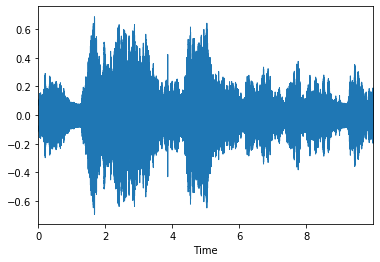

In [0]:
librosa.display.waveplot(y=y, sr=sr)

# Helper Functions

In [0]:
def Display(vector, title, x_axis, y_axis, format, fmax):
  plt.figure(figsize=(10,5))
  librosa.display.specshow(vector, y_axis=y_axis, x_axis=x_axis, fmax=fmax)
  plt.title(title)
  plt.colorbar(format=format)

In [0]:
def DisplaySemi(vector, label, ylabel, xlim):
  plt.figure(figsize=(10,5))
  plt.semilogy(vector, label=label)
  plt.ylabel(ylabel)
  plt.xticks([])
  plt.xlim(xlim)
  plt.legend()

# Chroma

## Chroma CQT


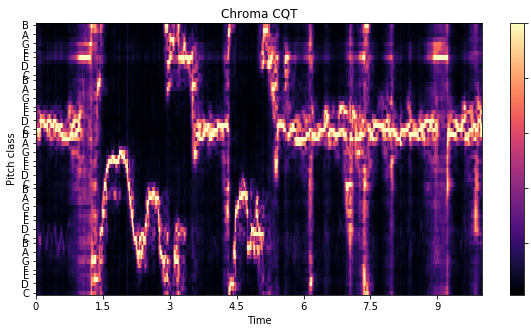

In [0]:
chroma_cq  = librosa.feature.chroma_cqt(y=y, sr=sr, n_chroma=60, bins_per_octave=60, n_octaves=7)
Display(chroma_cq, 'Chroma CQT', 'time', 'chroma', '', None)

## Chroma CENS

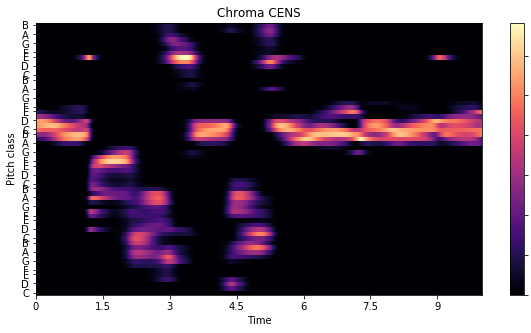

In [0]:
chroma_cens  = librosa.feature.chroma_cens(y=y, sr=sr, n_chroma=60)
Display(chroma_cens, 'Chroma CENS', 'time', 'chroma', '', None)

# Mel Spectrogram

In [0]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
Display(S_dB, 'Mel-frequency spectrogram', 'time', 'mel' , '%+2.0f db', 8000)

NameError: ignored

# MFCC

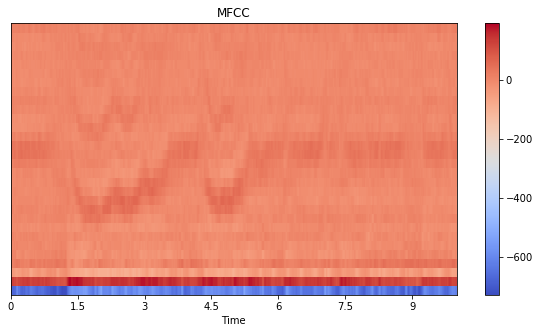

In [0]:
mfcc = librosa.feature.mfcc(S=S_dB, n_mfcc=30)
Display(mfcc, 'MFCC', 'time', None, None, None)

In [0]:
import pandas as pd
from google.colab import files
# save model image file to Google Drive
from google.colab import drive
drive.mount('/content/gdrive',  force_remount=True)

Mounted at /content/gdrive


In [0]:
!ls -la /content/gdrive/My\ Drive/Colab\ Notebooks/output

total 4
drwx------ 2 root root 4096 Dec 12 11:29 spec_bandwidth


In [0]:
import csv

In [0]:
def _get_rms(S, filename):
  rms = librosa.feature.rms(S=S)
  df = pd.DataFrame(rms)
  df.to_csv(filename+'.csv',header=False)
  files.download(filename+'.csv')

In [0]:
def _get_spec_bw(S, filename):
  spec_bw= librosa.feature.spectral_bandwidth(S=S)
  with open('/content/gdrive/My Drive/Colab Notebooks/output/spec_bandwidth/'+filename+".csv", "w") as f:
      writer = csv.writer(f)
      writer.writerows(spec_bw)

In [0]:
def _get_tempogram(y, sr, filename):
  tempogram = librosa.feature.tempogram(y=y,sr=sr)
  with open('/content/gdrive/My Drive/Colab Notebooks/output/tempogram/'+filename+".csv", "w") as f:
      writer = csv.writer(f)
      writer.writerows(tempogram)

In [0]:
def _get_oenv(y,sr,hop_length, filename):
  oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
  np.savetxt('/content/gdrive/My Drive/Colab Notebooks/output/oenv/'+filename+".csv",  oenv, delimiter=',') 

In [0]:
import os
for file in filenames:
  name, ext = os.path.splitext(file)
  y, sr = librosa.load(file)
  S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
  _get_oenv(y, sr, 512, name)
  _get_tempogram(y, sr, name)

# RMS

## Simple RMS

## RMS from Spectrogram

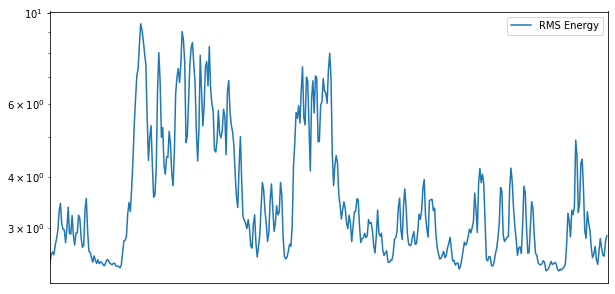

In [0]:
S = librosa.magphase(librosa.stft(y))[0]
rms = librosa.feature.rms(S=S)
DisplaySemi(rms.T, 'RMS Energy', None, [0,rms.shape[-1]])

#Spectral Centroid

<Figure size 432x288 with 0 Axes>

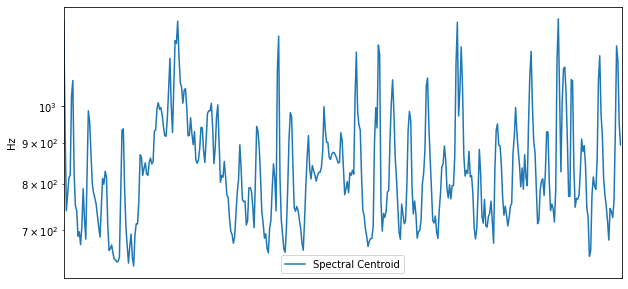

In [0]:
plt.figure()
S = librosa.magphase(librosa.stft(y=y))[0]
cent = librosa.feature.spectral_centroid(S=S)
DisplaySemi(cent.T, 'Spectral Centroid', 'Hz', [0,cent.shape[-1]])

# Spectral Bandwidth


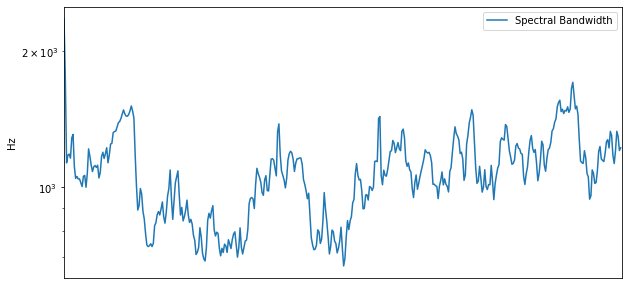

In [0]:
spec_bw = librosa.feature.spectral_bandwidth(S=S)
DisplaySemi(spec_bw.T, 'Spectral Bandwidth', 'Hz', [0, spec_bw.shape[-1]])

# Spectral Contrast

Text(0, 0.5, 'Frequency Bands')

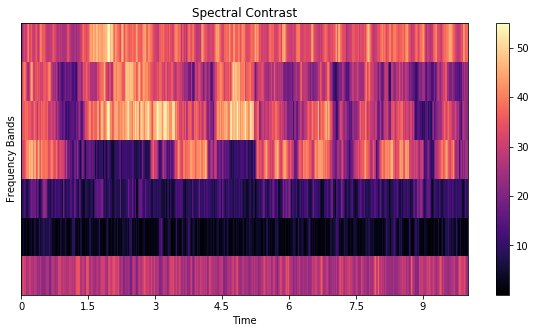

In [0]:
contrast = librosa.feature.spectral_contrast(S=S, sr=sr, n_bands=6)
Display(contrast, 'Spectral Contrast', 'time',None,None,None)
plt.ylabel('Frequency Bands')

# Spectral Flatness

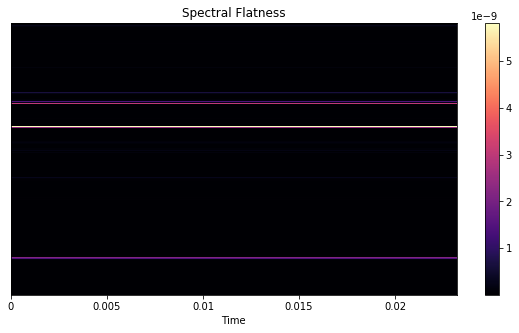

In [0]:
S_power = S ** 2
flatness = librosa.feature.spectral_flatness(S=S_power)
Display(flatness, 'Spectral Flatness', 'time', None, None, None)

#Rhythmic Features

## Tempogram

/usr/local/lib/python3.6/dist-packages/librosa/beat.py:306: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))


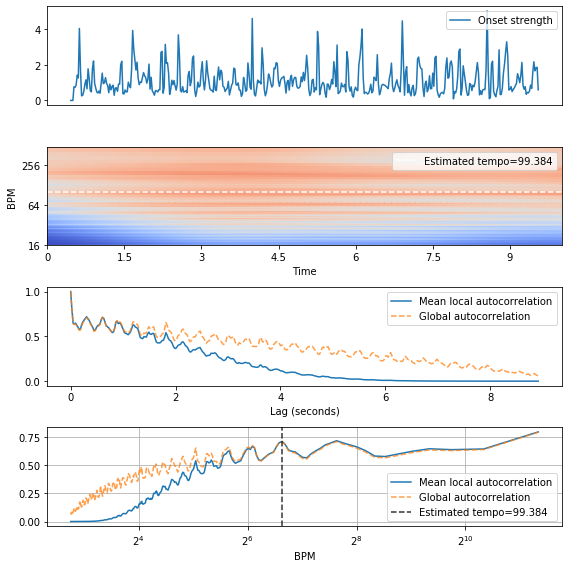

In [0]:
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(y=y,sr=sr)
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,hop_length=hop_length)[0]
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)
plt.figure(figsize=(8, 8))
plt.subplot(4, 1, 1)
plt.plot(oenv, label='Onset strength')
plt.xticks([])
plt.legend(frameon=True)
plt.axis('tight')
plt.subplot(4, 1, 2)
# We'll truncate the display to a narrower range of tempi
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo')
plt.axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
plt.legend(frameon=True, framealpha=0.75)
plt.subplot(4, 1, 3)
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr,
                num=tempogram.shape[0])
plt.plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
plt.plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
plt.xlabel('Lag (seconds)')
plt.axis('tight')
plt.legend(frameon=True)
plt.subplot(4,1,4)
# We can also plot on a BPM axis
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
plt.semilogx(freqs[1:], np.mean(tempogram[1:], axis=1),
             label='Mean local autocorrelation', basex=2)
plt.semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75,
             label='Global autocorrelation', basex=2)
plt.axvline(tempo, color='black', linestyle='--', alpha=.8,
            label='Estimated tempo={:g}'.format(tempo))
plt.legend(frameon=True)
plt.xlabel('BPM')
plt.axis('tight')
plt.grid()
plt.tight_layout()
plt.show()


## Fourier Tempogram

AttributeError here

In [0]:
f_tempogram = librosa.feature.fourier_tempogram(onset_envelope=oenv, sr=sr, hop_length=512)
plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
plt.plot(oenv, label='Onset strength')
plt.xticks([])
plt.legend(frameon=True)
plt.axis('tight')
plt.subplot(3, 1, 2)
librosa.display.specshow(np.abs(f_tempogram), sr=sr, x_axis='time', y_axis='fourier_tempo', cmap='magma')
plt.title('Fourier tempogram')
plt.subplot(3, 1, 3)
librosa.display.specshow(tempogram, sr=sr, x_axis='time', y_axis='tempo', cmap='magma')
plt.title('Autocorrelation tempogram')
plt.tight_layout()
plt.show()


AttributeError: ignored

# Essentia

In [0]:
!pip install essentia

     |████████████████████████████████| 11.1MB 209kB/s 


In [0]:
import essentia
import essentia.standard as es

In [0]:
for file in filenames:
  loader = es.MonoLoader(filename=file)
  audio = loader()
  pitch = es.PitchMelodia()(audio)[0]
  vibrato = es.Vibrato()(pitch)
  name, ext = os.path.splitext(file)
  with open('/content/gdrive/My Drive/Colab Notebooks/output/vibrato/'+name+".csv", "w") as f:
      writer = csv.writer(f)
      writer.writerows(vibrato)

In [0]:
df = pd.DataFrame.from_dict(chromaprint, orient='index')

In [0]:
df.to_csv('/content/gdrive/My Drive/Colab Notebooks/output/chromaprinter.csv')
files.download('/content/gdrive/My Drive/Colab Notebooks/output/chromaprinter.csv')

#ChromaPrinter

In [0]:
es.Chromaprinter()(audio)

'AQAAO1HySBIT_GByHtGV4-yD9irCRFMO-aKOWMenD80c1FtCPGcSHHOep4jyLYaWI5SLZ1mO83iQH3nGPBveFBeeNKhyHU3kBM-C8_iTDHo_XKiYRkeTROdwlsEv_PhxJcKpZENyB9eFHo6z4PPx4Nwo6MLzo2fx_ajRTDr-ok_geMcPvwYBJRLKEcAIAMYwBAgAjAKJCBFCAIcMQIwYwwCiShmiEVAAEYqUEMgRJAQhAABDiFBGAg'

# MusicExtractor

In [0]:
for file in filenames:
  features, features_frames = es.MusicExtractor()(file)
  pitch_salience = []
  beats_loudness = []
  dissonance = []
  bpm_histogram = []
  onset_rate = []
  tuning_diatonic_strength = []
  tuning_frequency = []
  tuning_nontempered_energy_ratio = []

  features, features_frames = es.MusicExtractor()(filenames[0])
  dissonance.append(features['lowlevel.dissonance.dmean'])
  dissonance.append(features['lowlevel.dissonance.dmean2'])
  dissonance.append(features['lowlevel.dissonance.dvar'])
  dissonance.append(features['lowlevel.dissonance.dvar2'])
  dissonance.append(features['lowlevel.dissonance.max'])
  dissonance.append(features['lowlevel.dissonance.min'])
  dissonance.append(features['lowlevel.dissonance.mean'])
  dissonance.append(features['lowlevel.dissonance.median'])
  dissonance.append(features['lowlevel.dissonance.stdev'])
  dissonance.append(features['lowlevel.dissonance.var'])

  beats_loudness.append(features['rhythm.beats_loudness.dmean'])
  beats_loudness.append(features['rhythm.beats_loudness.dmean2'])
  beats_loudness.append(features['rhythm.beats_loudness.dvar'])
  beats_loudness.append(features['rhythm.beats_loudness.dvar2'])
  beats_loudness.append(features['rhythm.beats_loudness.max'])
  beats_loudness.append(features['rhythm.beats_loudness.min'])
  beats_loudness.append(features['rhythm.beats_loudness.mean'])
  beats_loudness.append(features['rhythm.beats_loudness.median'])
  beats_loudness.append(features['rhythm.beats_loudness.stdev'])
  beats_loudness.append(features['rhythm.beats_loudness.var'])

  pitch_salience.append(features['lowlevel.pitch_salience.dmean'])
  pitch_salience.append(features['lowlevel.pitch_salience.dmean2'])
  pitch_salience.append(features['lowlevel.pitch_salience.dvar'])
  pitch_salience.append(features['lowlevel.pitch_salience.dvar2'])
  pitch_salience.append(features['lowlevel.pitch_salience.max'])
  pitch_salience.append(features['lowlevel.pitch_salience.min'])
  pitch_salience.append(features['lowlevel.pitch_salience.mean'])
  pitch_salience.append(features['lowlevel.pitch_salience.median'])
  pitch_salience.append(features['lowlevel.pitch_salience.stdev'])
  pitch_salience.append(features['lowlevel.pitch_salience.var'])
                        
  bpm_histogram = features['rhythm.bpm_histogram']
  onset_rate = features['rhythm.onset_rate']
  tuning_diatonic_strength = features['tonal.tuning_diatonic_strength']
  tuning_equal_tempered_deviation = features['tonal.tuning_equal_tempered_deviation']
  tuning_frequency = features['tonal.tuning_frequency']
  tuning_nontempered_energy_ratio = features['tonal.tuning_nontempered_energy_ratio']
  
  name, ext = os.path.splitext(file)

  np.savetxt('/content/gdrive/My Drive/Colab Notebooks/output/dissonance/'+name+".csv",  dissonance, delimiter=',') 
  np.savetxt('/content/gdrive/My Drive/Colab Notebooks/output/beats_loudness/'+name+".csv",  beats_loudness, delimiter=',') 
  np.savetxt('/content/gdrive/My Drive/Colab Notebooks/output/pitch_salience/'+name+".csv",  pitch_salience, delimiter=',') 
  np.savetxt('/content/gdrive/My Drive/Colab Notebooks/output/bpm_histogram/'+name+".csv",  bpm_histogram, delimiter=',')
  # np.savetxt('/content/gdrive/My Drive/Colab Notebooks/output/tuning_diatonic_strength/'+name+".csv",  tuning_diatonic_strength, delimiter=',')
  # np.savetxt('/content/gdrive/My Drive/Colab Notebooks/output/tuning_equal_tempered_deviation/'+name+".csv",  tuning_equal_tempered_deviation, delimiter=',')
  # np.savetxt('/content/gdrive/My Drive/Colab Notebooks/output/tuning_frequency/'+name+".csv",  tuning_frequency, delimiter=',') 
  # np.savetxt('/content/gdrive/My Drive/Colab Notebooks/output/tuning_nontempered_energy_ratio/'+name+".csv",  tuning_nontempered_energy_ratio, delimiter=',') 

# Melodia

## MultiPitchMelodia

In [0]:
melodia = es.MultiPitchMelodia()(audio)

3447

## PitchMelodia

In [0]:
pitch = es.PitchMelodia()(audio)[0]

## Vibrato

In [0]:
vibrato = es.Vibrato()(pitch)

## PitchContours

In [0]:
# unable to figure out input vectors

## Silvet